In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Latex font
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"], # LaTex font
})

In [3]:
label_str = 'diffusion_fig_02'
aux       = np.load(label_str+'.npz')

In [4]:
lam_vector  = aux["lam_vector"]
lam_test    = aux["lam_test"]
wMRes_error = aux["wMRes_error"] 
MRes_error  = aux["MRes_error"]

In [5]:
lam1 = np.linspace(1,10,101)
lam2 = np.linspace(1,10,101)

In [6]:
# Just to check axis are in the right direction
lam_test[np.where(wMRes_error == max(wMRes_error))]

array([[10.  ,  1.63]])

In [7]:
wMRes_matrix = wMRes_error.reshape((101,101)).transpose()

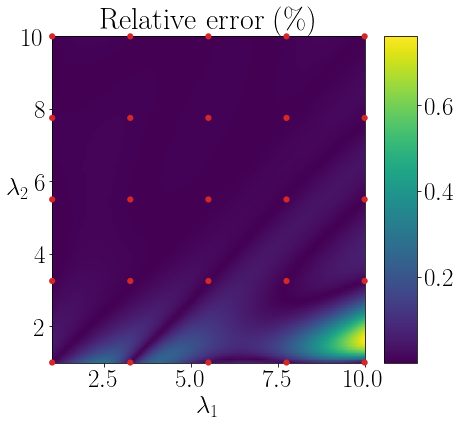

In [8]:
fig = plt.figure(figsize=(7,6))
# changes the fontsize of evething inside the plot
plt.rcParams.update({'font.size': 25})
# 
ax = fig.add_subplot(111)
# surface plot
im = ax.pcolormesh(lam1,lam2,wMRes_matrix,
                   shading='gouraud',
                   )
# scatter plot
plt.scatter(lam_vector.transpose()[0],lam_vector.transpose()[1],
            10*np.ones(lam_vector.shape[0]),  # coeff before vector changes the marker size
            color='tab:red',                  # marker color
            marker='o',                       # marker shape
            linewidth=3.0,                    # marker size          
            clip_on=False,                    # shows outside the boundary square
            zorder=3                          # shows over the boundary square 
           )
#
ax.set_title("Relative error (\%)")
#
ax.set_xlabel(r'$\lambda_1$')
ax.set_ylabel(r'$\lambda_2$', 
              rotation=0)                     # makes y-label horizontal  
# colorbar
cbar = fig.colorbar(im, aspect=10)
#
plt.savefig('output_POSTER.png', dpi=600, facecolor=None, edgecolor=None,
            orientation='portrait', format='png',transparent=True, 
            bbox_inches='tight', pad_inches=0.1, metadata=None)